# Lab 2

### Contents

1. [Last class review](#last-class-review)
    1. [Lineplot](#lineplot)
    2. [Areaplot](#areaplot)
    3. [Histogram](#histogram)
2. [Exercise 1](#exercise1)
3. [Bar plot](#barplot)
    1. [Exercise 2](#exercise2)
    2. [Exercise 3](#exercise3)
4. [Pie chart](#piechart)
    1. [Exercise 4](#exercise4)
5. [Box plot](#boxplot)
    1. [Exercise 5](#exercise5)

### Last Class Review <a name="last-class-review"></a>

Last class we learned how to make some basic plots with matplotlib reading from pandas dataframes.

We looked at 3 plots: Line, Area and Histograms

#### Line Plot <a name="lineplot"></a>

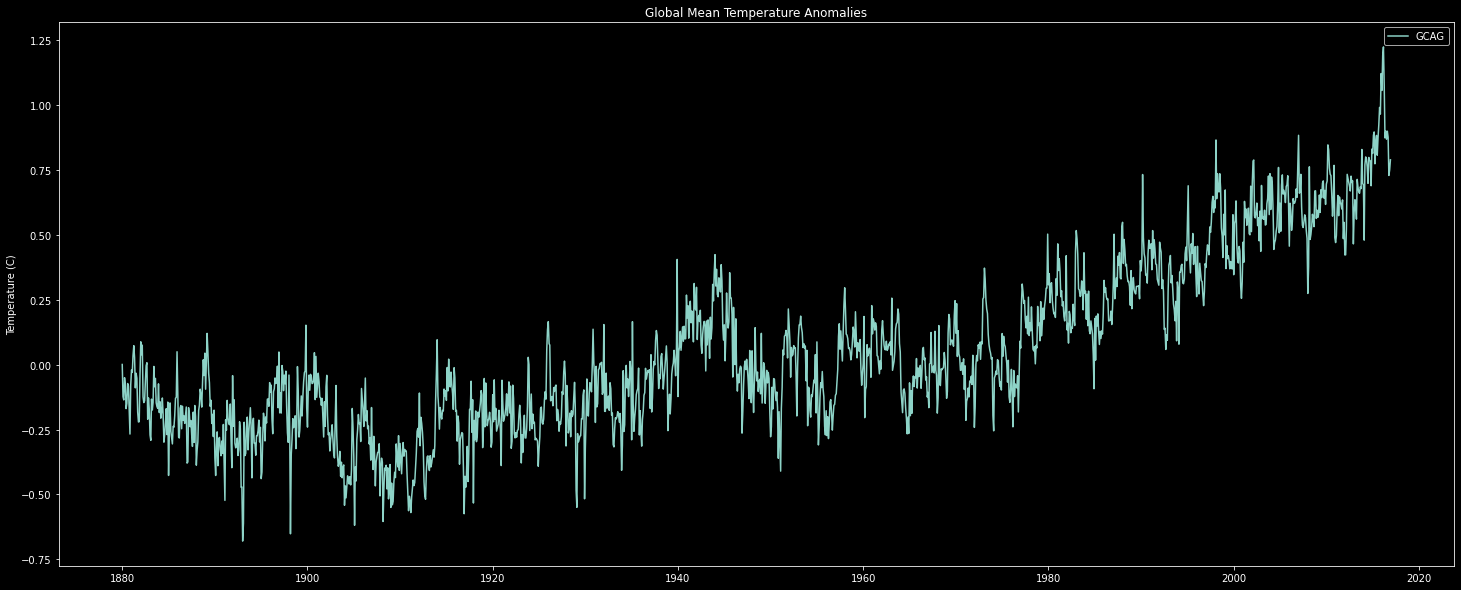

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(gcag.Date, gcag.Mean)
ax.legend(['GCAG'])
plt.ylabel("Temperature (C)")
plt.title("Global Mean Temperature Anomalies")
plt.show()

#### Area Plot <a name="areaplot"></a>

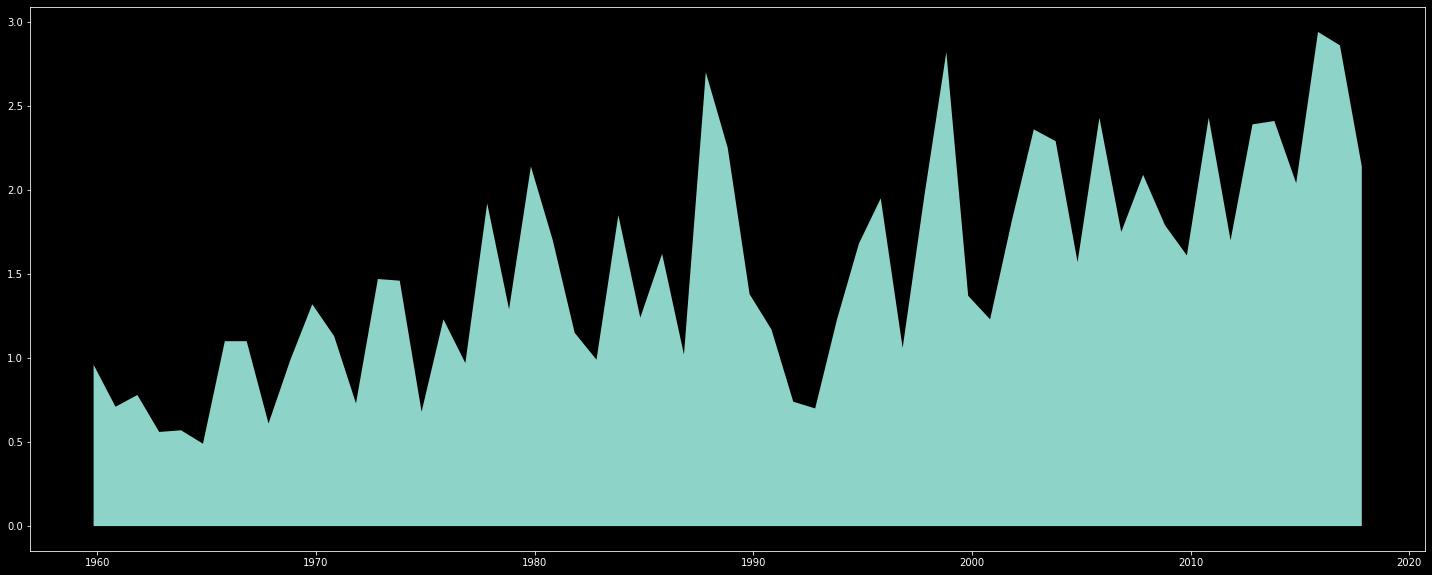

In [ ]:
fig = plt.Figure(figsize=(25,10))
ax = fig.add_subplot()
ax.fill_between(data["Year"], 0, data["Annual Increase"])
fig

#### Histogram <a name="histogram"></a>

Text(0.5, 0, 'CO2 Emissions (Tons x1000)')

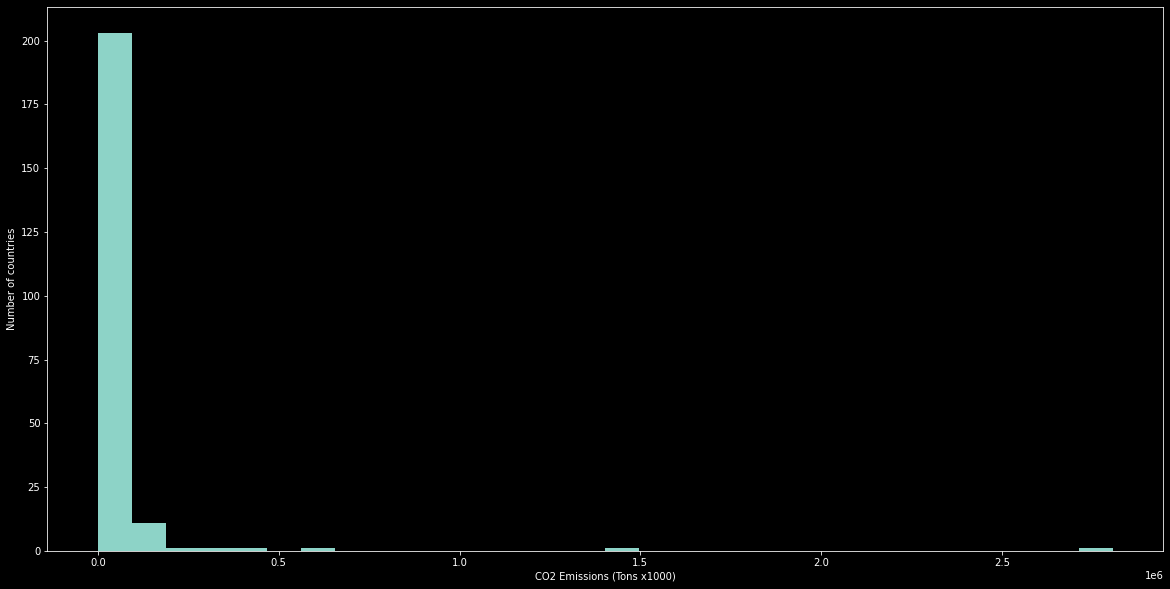

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(year2014["Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)"], bins=30)
plt.ylabel("Number of countries")
plt.xlabel("CO2 Emissions (Tons x1000)")

### New dataset for this class !

We are going to use the chile inmigrants dataset wich is also used for the current homework assignment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import numpy as np

In [ ]:
path = "../MigrantesChile (2005-2016).xlsx"
dataset = pd.read_excel(path)
dataset.head()
dataset.columns = dataset.columns.astype(str)

In [ ]:
dataset.head()

,ID Continent,Continent,ID Country,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,142,Asia,308,Afghanistán,8,4,5,1,2,1,3,6,15,4,12,15
1,150,Europa,518,Albania,2,1,1,2,2,5,3,2,1,2,7,11
2,150,Europa,563,Alemania,495,481,562,614,587,644,685,747,687,845,778,582
3,150,Europa,525,Andorra,2,1,1,1,0,0,2,0,1,2,2,1
4,2,África,140,Angola,1,2,4,3,2,4,6,8,1,1,13,19


### Excercice 1 <a name="exercise1"></a>

Practice what we learned last class. 

Create a histogram that shows the country frequency for number of inmigrants. In other words, the number of countries (Y axis) vs the number of inmigrants (X axis).

In [ ]:
dataset.loc[:,'total'] = dataset.iloc[:,4:15].sum(axis=1)

In [ ]:
dataset.head(10)

,ID Continent,Continent,ID Country,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
0,142,Asia,308,Afghanistán,8,4,5,1,2,1,3,6,15,4,12,15,61
1,150,Europa,518,Albania,2,1,1,2,2,5,3,2,1,2,7,11,28
2,150,Europa,563,Alemania,495,481,562,614,587,644,685,747,687,845,778,582,7125
3,150,Europa,525,Andorra,2,1,1,1,0,0,2,0,1,2,2,1,12
4,2,África,140,Angola,1,2,4,3,2,4,6,8,1,1,13,19,45
5,19,América,240,Antigua y Barbuda,0,0,0,1,0,0,0,0,0,0,0,0,1
6,999,Otros,247,Antillas Neerlandesas,0,0,0,0,0,0,0,0,1,0,1,0,2
7,142,Asia,302,Arabia Saudita,1,2,0,0,1,0,0,2,2,0,0,0,8
8,2,África,127,Argelia,2,0,2,1,3,8,3,4,10,8,12,9,53
9,19,América,224,Argentina,6263,6114,5656,5345,5453,5387,5438,6548,7436,8326,9605,8176,71571


(array([172.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([     0. ,  34200.4,  68400.8, 102601.2, 136801.6, 171002. ,
        205202.4, 239402.8, 273603.2, 307803.6, 342004. , 376204.4,
        410404.8, 444605.2, 478805.6, 513006. ]),
 <a list of 15 Patch objects>)

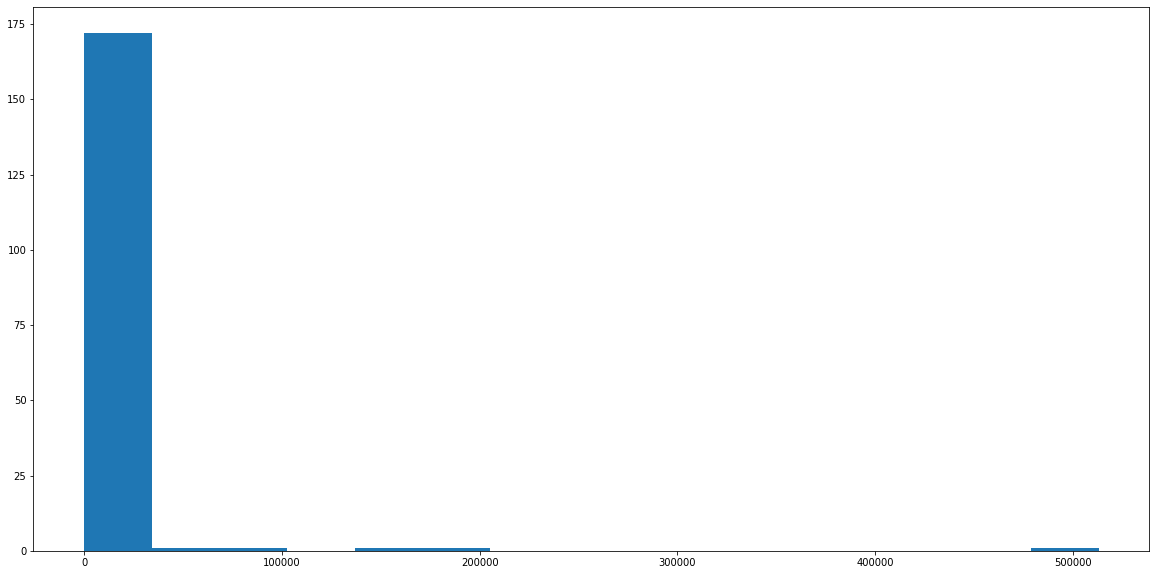

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(dataset.total, bins=15)

### Bar plot <a name="barplot"></a>

Bar plot is a way of displaying the value of a variable (or many) using bars. It is helpful to make comparisons.

<BarContainer object of 3 artists>

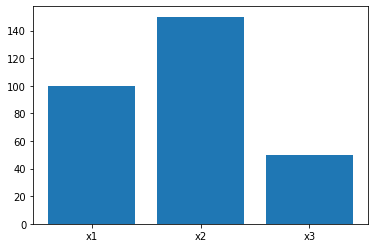

In [ ]:
x_axis = ["x1", "x2", "x3"]
y_axis = [100, 150, 50]
plt.bar(x_axis, y_axis)

### Exercise 2 <a name="exercise2"></a>

Make a bar plot that compares the total inmigrants for two countries

In [ ]:
countries = ["Argentina", "Perú"]
values = dataset.loc[dataset["Country"].isin(countries)].total
values

9       71571
127    513006
Name: total, dtype: int64

<BarContainer object of 2 artists>

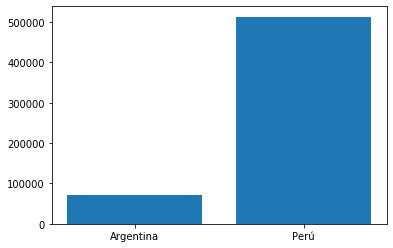

In [ ]:
plt.bar(countries, values)

**Let's make it more modular and generic converting our code to functions**

In [ ]:
def compareCountries(countries):
    values = dataset.loc[dataset["Country"].isin(countries)].total
    plt.bar(countries, values)

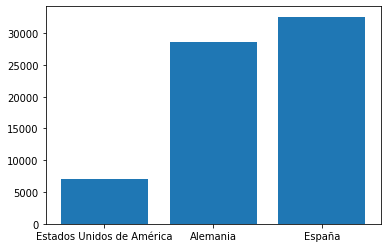

In [ ]:
compareCountries(["Estados Unidos de América", "Alemania", "España"])

More variations for bar plots:

- Stacked
- Grouped

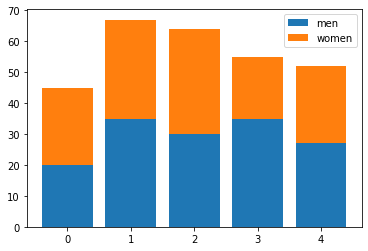

In [ ]:
N = 5
men = (20, 35, 30, 35, 27)
women = (25, 32, 34, 20, 25)
ind = np.arange(N)
p1 = plt.bar(ind, men )
p2 = plt.bar(ind, women, bottom=men)
plt.legend((p1,p2), ("men", "women"))

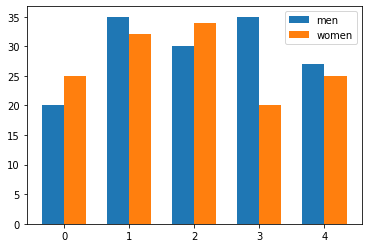

In [ ]:
N = 5
men = (20, 35, 30, 35, 27)
women = (25, 32, 34, 20, 25)
ind = np.arange(N)
width = 0.34
p1 = plt.bar(ind - 0.17, men, width=width, )
p2 = plt.bar(ind+0.17, women, width=width)
plt.legend((p1,p2), ("men", "women"))

### Exercise 3 <a name="exercise3"></a>

Create a bar plot stacked or grouped that shows two countries and two years compared

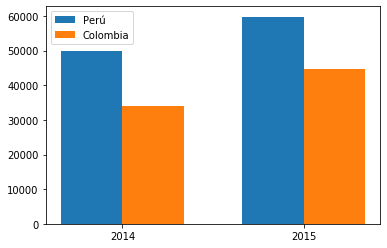

In [ ]:
N = 2
peru = dataset.loc[dataset.Country == "Perú",["2014", "2015"]]
colombia = dataset.loc[dataset.Country == "Colombia", ["2014", "2015"]]
width = 0.34
x = np.arange(2)
p1 = plt.bar(x-0.17, peru.iloc[0], width=width )
p2 = plt.bar(x+0.17, colombia.iloc[0], width=width)
plt.legend((p1,p2), ("Perú", "Colombia"))
plt.xticks(x, ["2014", "2015"])
plt.show()

### Pie Charts <a name="piechart"></a>

Pie charts are used to compare values from a variable using sizes of "pie slices". Each slice represents the percentage of that value.

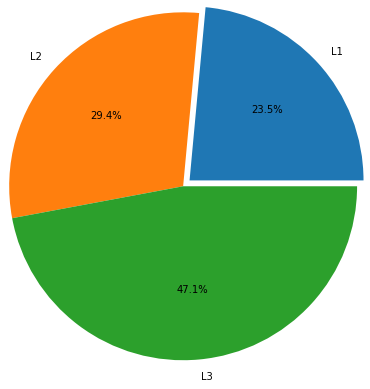

In [ ]:
labels = ["L1", "L2", "L3"]
values = [40, 50, 80]
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=(0.1,0,0), radius=2)
plt.show()

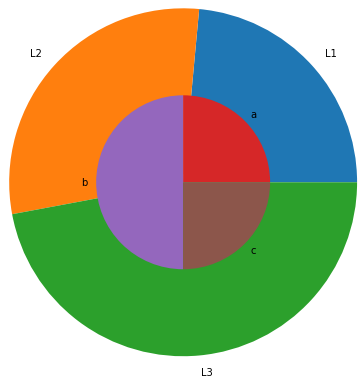

In [ ]:
labels = ["L1", "L2", "L3"]
values = [40, 50, 80]
plt.pie(values, labels=labels, radius=2)
plt.pie([1,2,1], labels=["a", "b","c"], radius=1)
plt.show()

### Exercise 4 <a name="exercise4"></a>

Create a Pie chart that shows the percentage of inmigrants per country in America

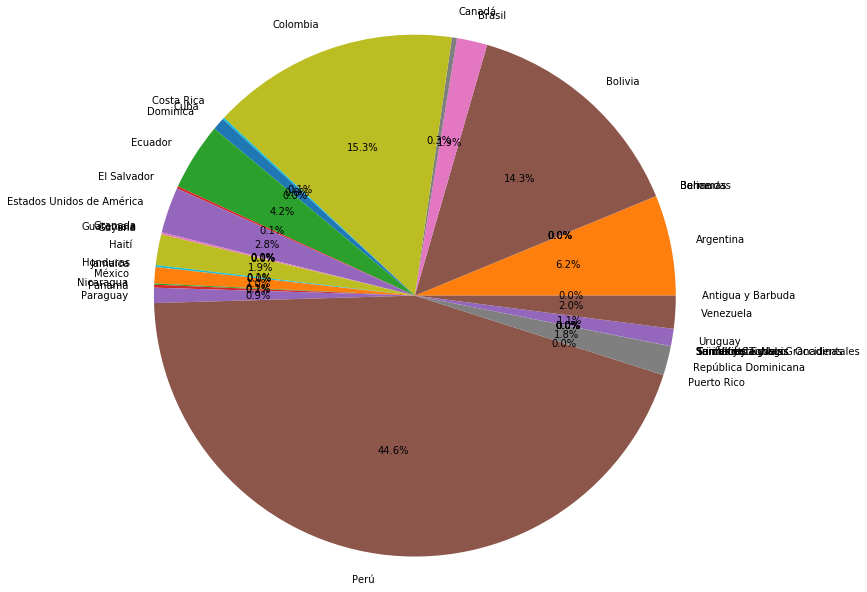

In [ ]:
america = dataset[dataset["Continent"] == "América"]
plt.pie(america.total, labels=america.Country, radius=3 , autopct='%1.1f%%')
plt.show()

### Boxplot <a name="boxplot"></a>

A boxplot is a type of plot that tries to visualize the distribution of a variable in a simplified way. It helps us to compare a numerical variable for different groups or categories.

<img src="https://github.com/dirodriguezm/practicas_diploma/blob/master/Practica2/boxplot.png?raw=1"/>

There are 3 concepts in a Boxplot:

- **Quartile**:

    Quartile are groups of the same ammount of ordered values. There are 4 quartiles and to draw a boxplot you need 3 position values
- **Position Values**:
    
    There are 3 position values: $q_1$, $q_2$ and $q_3$ that correspond to the upper bound value of the first three quartiles. These values define the size of the box. In practice (matplotlib), position values are calculated like this:
    - $q_2$: find the median wich is the middle value. If there are an odd number of points, then the median is the average between the two in the middle.
    - $q_1$: find the value that is between the median and the minimum value
    - $q_3$: find the value that is between the median and the maximum value
    
    
- **Size of the box or IQR (Interquartile range)**:
    \begin{equation}
    IQR = q_3-q_1
    \end{equation}
   
- **Border values**

    These are the min and max values for the boxplot. They are defined as 
    \begin{equation}
    min = q_1 - w \cdot IQR \\
    max = q3 + w \cdot IQR
    \end{equation}
    
    Where $w$ is called the whisker parameter (in matplotlib use *whis*).
    
- **Outliers or fliers**

    Outliers are values outside of the defined min and max caps.

In [ ]:
data = [2,4,3,1]

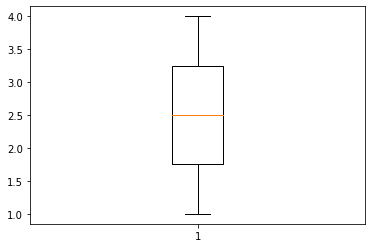

In [ ]:
box = plt.boxplot(data)
#plt.yticks(np.arange(1, 5, step=1))
plt.show()

In [ ]:
data = np.array(data)
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

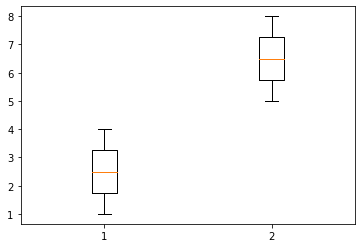

In [ ]:
data = [data,[5,6,7,8]]
box = plt.boxplot(data)


### Exercise 5 <a name="exercise5"></a>

Create a box plot showing the total inmigrants for two countries

In [ ]:
peru = dataset.loc[dataset["Country"] == "Perú", ["2010", "2011", "2012", "2013", "2014", "2015", "2016"]]
colombia = dataset.loc[dataset["Country"] == "Colombia", ["2010", "2011", "2012", "2013", "2014", "2015", "2016"]]

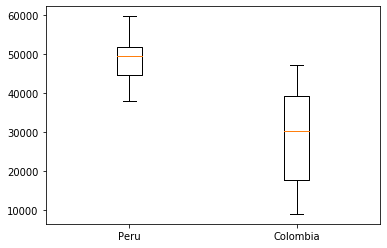

In [ ]:
data = [peru.values[0], colombia.values[0]]
plt.boxplot(data)
plt.xticks([1,2], ["Peru", "Colombia"])
plt.show()